<a href="https://colab.research.google.com/github/sahithi-code/123pet/blob/main/pro117.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
data_to_load = files.upload()

Saving pro117.csv to pro117.csv


In [3]:
import pandas as pd
import csv

df = pd.read_csv("pro117.csv")
print(df.head())

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


In [4]:
from sklearn.model_selection import train_test_split

X = df[["variance","skewness","curtosis","entropy",]]
Y = df["class"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)


In [5]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, Y_train)
y_prediction = lr.predict(X_test)

predicted_values = []
for i in y_prediction:
  if i == 0:
    predicted_values.append("Authorized")
  else:
    predicted_values.append("Forged")

actual_values = []
for i in Y_test.ravel():
  if i == 0:
    actual_values.append("Authorized")
  else:
    actual_values.append("Forged")

[Text(0, 0.5, 'Forged'), Text(0, 1.5, 'Authorized')]

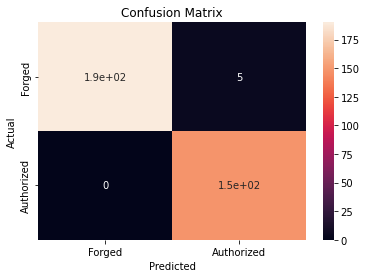

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

labels = ["Forged", "Authorized"]

cm = confusion_matrix(actual_values, predicted_values)

ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels)